In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('/content/cleaned_f1_data_New.csv')

In [3]:
df.head()

,Season,Round,Race Name,Date,Circuit,Country,Latitude,Longitude,Driver,Driver Nationality,...,Constructor,Constructor Nationality,Grid Position,Race Position,Points Earned,Fastest Lap (s),Fastest Lap Rank,Total Pit Stops,Race Laps Completed,Retirement Status
0,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Bob Gerard,British,...,ERA,British,13,6,0.0,93.053598,-1,-1,67,Finished
1,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Cuth Harrison,British,...,ERA,British,15,7,0.0,93.053598,-1,-1,67,Finished
2,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,David Hampshire,British,...,Maserati,Italian,16,9,0.0,93.053598,-1,-1,64,Finished
3,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Brian Shawe Taylor,British,...,Maserati,Italian,20,10,0.0,93.053598,-1,-1,64,Finished
4,1950,1,British Grand Prix,1950-05-13,Silverstone Circuit,UK,52.0786,-1.01694,Joe Fry,British,...,Maserati,Italian,20,10,0.0,93.053598,-1,-1,64,Finished


In [4]:
to_drop = ['Driver Championship Points','Latitude', 'Longitude','Driver Experience (Years)', 'Driver Fastest Lap Time', 'Driver Fastest Lap Rank', 'Points Earned', 'Fastest Lap (s)', 'Fastest Lap Rank', 'Total Pit Stops','Date','Country','Driver Nationality','Round','Season']
df = df.drop(columns=to_drop, errors='ignore')
df.columns

Index(['Race Name', 'Circuit', 'Driver', 'Driver Age', 'Constructor',
       'Constructor Nationality', 'Grid Position', 'Race Position',
       'Race Laps Completed', 'Retirement Status'],
      dtype='object')

In [5]:
df.head()

,Race Name,Circuit,Driver,Driver Age,Constructor,Constructor Nationality,Grid Position,Race Position,Race Laps Completed,Retirement Status
0,British Grand Prix,Silverstone Circuit,Bob Gerard,36,ERA,British,13,6,67,Finished
1,British Grand Prix,Silverstone Circuit,Cuth Harrison,44,ERA,British,15,7,67,Finished
2,British Grand Prix,Silverstone Circuit,David Hampshire,33,Maserati,Italian,16,9,64,Finished
3,British Grand Prix,Silverstone Circuit,Brian Shawe Taylor,35,Maserati,Italian,20,10,64,Finished
4,British Grand Prix,Silverstone Circuit,Joe Fry,35,Maserati,Italian,20,10,64,Finished


Categorical Values

In [6]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_cols)

categories_list = [df[col].unique().tolist() for col in categorical_cols]

encoder = OrdinalEncoder(categories=categories_list)
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

df.head()

Categorical Columns: ['Race Name', 'Circuit', 'Driver', 'Constructor', 'Constructor Nationality', 'Retirement Status']


,Race Name,Circuit,Driver,Driver Age,Constructor,Constructor Nationality,Grid Position,Race Position,Race Laps Completed,Retirement Status
0,0.0,0.0,0.0,36,0.0,0.0,13,6,67,0.0
1,0.0,0.0,1.0,44,0.0,0.0,15,7,67,0.0
2,0.0,0.0,2.0,33,1.0,1.0,16,9,64,0.0
3,0.0,0.0,3.0,35,1.0,1.0,20,10,64,0.0
4,0.0,0.0,4.0,35,1.0,1.0,20,10,64,0.0


Making the target Variable into Categorical

In [7]:
def categorize_positions(df):
    # Create a new column for position category
    df['Position_Category'] = ''

    # Apply conditions for 3 labels
    df.loc[df['Race Position'] <= 10, 'Position_Category'] = 'Top 10'
    df.loc[(df['Race Position'] > 10) & (df['Race Position'] <= 20), 'Position_Category'] = 'Midfield'
    df.loc[df['Race Position'] > 20, 'Position_Category'] = 'Backmarkers'

    return df


In [8]:
df = categorize_positions(df)

In [9]:
df.head()

,Race Name,Circuit,Driver,Driver Age,Constructor,Constructor Nationality,Grid Position,Race Position,Race Laps Completed,Retirement Status,Position_Category
0,0.0,0.0,0.0,36,0.0,0.0,13,6,67,0.0,Top 10
1,0.0,0.0,1.0,44,0.0,0.0,15,7,67,0.0,Top 10
2,0.0,0.0,2.0,33,1.0,1.0,16,9,64,0.0,Top 10
3,0.0,0.0,3.0,35,1.0,1.0,20,10,64,0.0,Top 10
4,0.0,0.0,4.0,35,1.0,1.0,20,10,64,0.0,Top 10


In [10]:
df.to_csv('cleaned_SVM.csv', index=False)

In [11]:
df=df.drop('Race Position', axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Race Name                3616 non-null   float64
 1   Circuit                  3616 non-null   float64
 2   Driver                   3616 non-null   float64
 3   Driver Age               3616 non-null   int64  
 4   Constructor              3616 non-null   float64
 5   Constructor Nationality  3616 non-null   float64
 6   Grid Position            3616 non-null   int64  
 7   Race Laps Completed      3616 non-null   int64  
 8   Retirement Status        3616 non-null   float64
 9   Position_Category        3616 non-null   object 
dtypes: float64(6), int64(3), object(1)
memory usage: 282.6+ KB


Converting all features into one single data type

In [13]:
df[['Driver Age', 'Grid Position', 'Race Laps Completed']]=df[['Driver Age', 'Grid Position', 'Race Laps Completed']].astype(float)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Race Name                3616 non-null   float64
 1   Circuit                  3616 non-null   float64
 2   Driver                   3616 non-null   float64
 3   Driver Age               3616 non-null   float64
 4   Constructor              3616 non-null   float64
 5   Constructor Nationality  3616 non-null   float64
 6   Grid Position            3616 non-null   float64
 7   Race Laps Completed      3616 non-null   float64
 8   Retirement Status        3616 non-null   float64
 9   Position_Category        3616 non-null   object 
dtypes: float64(9), object(1)
memory usage: 282.6+ KB


Applying SVM

In [15]:
X=df.drop(['Position_Category'],axis=1)
y=df['Position_Category']

Train-Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Before Transformation

In [17]:
X_train_df = pd.DataFrame(X_train)
print(X_train_df)

      Race Name  Circuit  Driver  Driver Age  Constructor  \
2592       11.0     22.0   425.0        31.0        125.0   
3216        6.0      7.0   473.0        28.0          5.0   
1228        4.0      4.0   262.0        28.0         42.0   
1234        7.0      8.0   306.0        26.0         87.0   
794         1.0      1.0   222.0        27.0         46.0   
...         ...      ...     ...         ...          ...   
1130       10.0     17.0   237.0        33.0         73.0   
1294        7.0      8.0   315.0        29.0         89.0   
860         8.0     11.0   261.0        28.0         70.0   
3507       10.0     28.0   509.0        22.0        114.0   
3174       17.0     13.0   482.0        24.0        134.0   

      Constructor Nationality  Grid Position  Race Laps Completed  \
2592                      5.0           17.0                 56.0   
3216                      1.0            4.0                  0.0   
1228                      0.0            2.0                

Scaling the Features

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train_df = pd.DataFrame(X_train)
X_train_df.head()

,0,1,2,3,4,5,6,7,8
0,0.633143,0.940873,0.744424,0.065303,1.118686,1.305564,0.609343,0.631105,0.510030
1,-0.414009,-0.713903,1.100863,-0.561431,-1.638465,-0.136640,-1.123028,-1.273713,0.510030
2,-0.832870,-1.044859,-0.465982,-0.561431,-0.788343,-0.497192,-1.389546,-0.933567,0.510030
3,-0.204578,-0.603585,-0.139247,-0.979254,0.245589,-0.497192,0.476084,1.379426,-1.960669
4,-1.461161,-1.375814,-0.763014,-0.770343,-0.696438,-0.497192,-0.323472,-0.695465,0.510030


After Transformation

In [20]:
original_column_names = X.columns
X_train_df = pd.DataFrame(X_train, columns=original_column_names)
X_train_df.head()
print(X_train_df)

      Race Name   Circuit    Driver  Driver Age  Constructor  \
0      0.633143  0.940873  0.744424    0.065303     1.118686   
1     -0.414009 -0.713903  1.100863   -0.561431    -1.638465   
2     -0.832870 -1.044859 -0.465982   -0.561431    -0.788343   
3     -0.204578 -0.603585 -0.139247   -0.979254     0.245589   
4     -1.461161 -1.375814 -0.763014   -0.770343    -0.696438   
...         ...       ...       ...         ...          ...   
2887   0.423713  0.389281 -0.651627    0.483126    -0.076079   
2888  -0.204578 -0.603585 -0.072414   -0.352520     0.291541   
2889   0.004852 -0.272630 -0.473408   -0.561431    -0.145008   
2890   0.423713  1.602783  1.368192   -1.814900     0.865948   
2891   1.889725 -0.051993  1.167695   -1.397077     1.325473   

      Constructor Nationality  Grid Position  Race Laps Completed  \
0                    1.305564       0.609343             0.631105   
1                   -0.136640      -1.123028            -1.273713   
2                   -0.4

In [21]:
X_train_df.to_csv('Trained_SVM.csv', index=False)

In [22]:
y_train = y_train.astype('category')
print(y_train.head())

2592       Midfield
3216    Backmarkers
1228       Midfield
1234         Top 10
794        Midfield
Name: Position_Category, dtype: category
Categories (3, object): ['Backmarkers', 'Midfield', 'Top 10']


In [23]:
print(y_train)

2592       Midfield
3216    Backmarkers
1228       Midfield
1234         Top 10
794        Midfield
           ...     
1130         Top 10
1294         Top 10
860        Midfield
3507       Midfield
3174       Midfield
Name: Position_Category, Length: 2892, dtype: category
Categories (3, object): ['Backmarkers', 'Midfield', 'Top 10']


In [24]:
y_train.to_csv('Y_Trained_SVM.csv', index=False)

In [25]:
original_column_names = X.columns
X_test_df = pd.DataFrame(X_test, columns=original_column_names)
X_test_df.head()

,Race Name,Circuit,Driver,Driver Age,Constructor,Constructor Nationality,Grid Position,Race Laps Completed,Retirement Status
0,0.004852,0.058325,1.115714,-1.814900,-0.374770,-0.497192,1.808677,-0.593421,0.51003
1,0.004852,0.058325,-0.406576,0.900949,-0.305842,-0.497192,0.476084,-0.219260,0.51003
2,0.633143,0.609917,0.855811,-0.770343,1.279520,-0.136640,-1.656065,-1.273713,0.51003
3,0.633143,0.940873,-0.005582,1.318772,0.751066,0.223911,-0.056953,-0.525392,0.51003
4,0.633143,0.609917,0.016695,-0.143609,-1.638465,-0.136640,-0.589990,-0.933567,0.51003


In [26]:
print(X_test_df)

     Race Name   Circuit    Driver  Driver Age  Constructor  \
0     0.004852  0.058325  1.115714   -1.814900    -0.374770   
1     0.004852  0.058325 -0.406576    0.900949    -0.305842   
2     0.633143  0.609917  0.855811   -0.770343     1.279520   
3     0.633143  0.940873 -0.005582    1.318772     0.751066   
4     0.633143  0.609917  0.016695   -0.143609    -1.638465   
..         ...       ...       ...         ...          ...   
719  -0.414009 -0.713903 -1.654111   -0.143609    -1.592512   
720   0.004852  0.058325  0.387985    0.274214     0.636185   
721  -1.461161 -1.375814 -1.134304    0.900949    -0.765367   
722  -1.461161 -1.375814 -1.112027   -0.561431    -0.742391   
723   0.633143  0.940873  0.551353    0.483126     0.360470   

     Constructor Nationality  Grid Position  Race Laps Completed  \
0                  -0.497192       1.808677            -0.593421   
1                  -0.497192       0.476084            -0.219260   
2                  -0.136640      -1.65

In [27]:
X_test_df.to_csv('Test_SVM.csv', index=False)

In [28]:
y_test = y_test.astype('category')
print(y_test.head())

2917       Midfield
1255       Midfield
2800    Backmarkers
2144    Backmarkers
1936    Backmarkers
Name: Position_Category, dtype: category
Categories (3, object): ['Backmarkers', 'Midfield', 'Top 10']


In [29]:
print(y_test)

2917       Midfield
1255       Midfield
2800    Backmarkers
2144    Backmarkers
1936    Backmarkers
           ...     
176        Midfield
1953       Midfield
422     Backmarkers
680        Midfield
2588         Top 10
Name: Position_Category, Length: 724, dtype: category
Categories (3, object): ['Backmarkers', 'Midfield', 'Top 10']


In [30]:
y_test.to_csv('Y_Tested_SVM.csv', index=False)

Polynomial Kernel

degree = 3
Cost = 1

In [31]:
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_poly.fit(X_train, y_train)
y_pred_poly_c1 = svm_poly.predict(X_test)

print("\n Polynomial Kernel (degree=3) (C=1)")
print("Accuracy:", accuracy_score(y_test, y_pred_poly_c1))
print(classification_report(y_test, y_pred_poly_c1))


 Polynomial Kernel (degree=3) (C=1)
Accuracy: 0.8411602209944752
              precision    recall  f1-score   support

 Backmarkers       0.89      0.69      0.78       201
    Midfield       0.77      0.95      0.85       341
      Top 10       1.00      0.80      0.89       182

    accuracy                           0.84       724
   macro avg       0.89      0.81      0.84       724
weighted avg       0.86      0.84      0.84       724



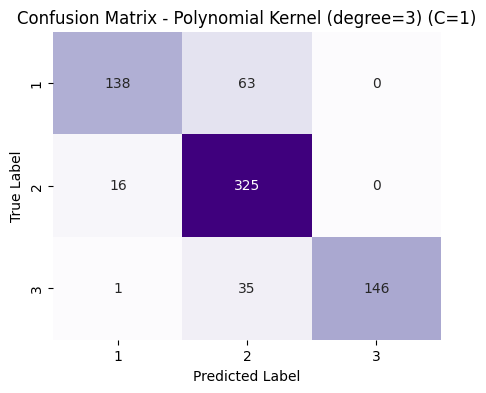

In [32]:
cm_poly_c1 = confusion_matrix(y_test, y_pred_poly_c1)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_poly_c1, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=["1", "2", "3"], yticklabels=["1", "2", "3"])
plt.title("Confusion Matrix - Polynomial Kernel (degree=3) (C=1)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [33]:
svm_poly_c2 = SVC(kernel='poly', degree=3, C=2.0)
svm_poly_c2.fit(X_train, y_train)
y_pred_poly_c2 = svm_poly_c2.predict(X_test)

print("\n Polynomial Kernel (degree=3) (C=2)")
print("Accuracy:", accuracy_score(y_test, y_pred_poly_c2))
print(classification_report(y_test, y_pred_poly_c2))


 Polynomial Kernel (degree=3) (C=2)
Accuracy: 0.850828729281768
              precision    recall  f1-score   support

 Backmarkers       0.88      0.73      0.80       201
    Midfield       0.79      0.94      0.86       341
      Top 10       1.00      0.81      0.89       182

    accuracy                           0.85       724
   macro avg       0.89      0.83      0.85       724
weighted avg       0.87      0.85      0.85       724



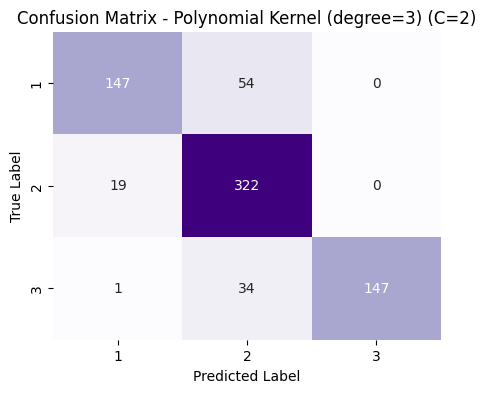

In [34]:
cm_poly_c2 = confusion_matrix(y_test, y_pred_poly_c2)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_poly_c2, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=["1", "2", "3"], yticklabels=["1", "2", "3"])
plt.title("Confusion Matrix - Polynomial Kernel (degree=3) (C=2)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [35]:
svm_poly_c3 = SVC(kernel='poly', degree=3, C=3.0)
svm_poly_c3.fit(X_train, y_train)
y_pred_poly_c3 = svm_poly_c3.predict(X_test)

print("\n Polynomial Kernel (degree=3) (C=3)")
print("Accuracy:", accuracy_score(y_test, y_pred_poly_c3))
print(classification_report(y_test, y_pred_poly_c3))


 Polynomial Kernel (degree=3) (C=3)
Accuracy: 0.8549723756906077
              precision    recall  f1-score   support

 Backmarkers       0.88      0.75      0.81       201
    Midfield       0.79      0.94      0.86       341
      Top 10       1.00      0.81      0.89       182

    accuracy                           0.85       724
   macro avg       0.89      0.83      0.85       724
weighted avg       0.87      0.85      0.85       724



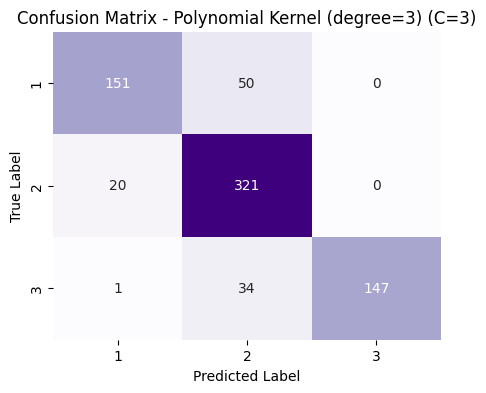

In [36]:
cm_poly_c3 = confusion_matrix(y_test, y_pred_poly_c3)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_poly_c3, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=["1", "2", "3"], yticklabels=["1", "2", "3"])
plt.title("Confusion Matrix - Polynomial Kernel (degree=3) (C=3)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

RBF kernel

cost=1.5

In [37]:
svm_rbf_c1 = SVC(kernel='rbf', gamma='scale', C=1.5)
svm_rbf_c1.fit(X_train, y_train)
y_pred_rbf_c1 = svm_rbf_c1.predict(X_test)

print("\n RBF Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf_c1))
print(classification_report(y_test, y_pred_rbf_c1))


 RBF Kernel
Accuracy: 0.8425414364640884
              precision    recall  f1-score   support

 Backmarkers       0.84      0.76      0.80       201
    Midfield       0.79      0.91      0.85       341
      Top 10       1.00      0.80      0.89       182

    accuracy                           0.84       724
   macro avg       0.88      0.82      0.84       724
weighted avg       0.85      0.84      0.84       724



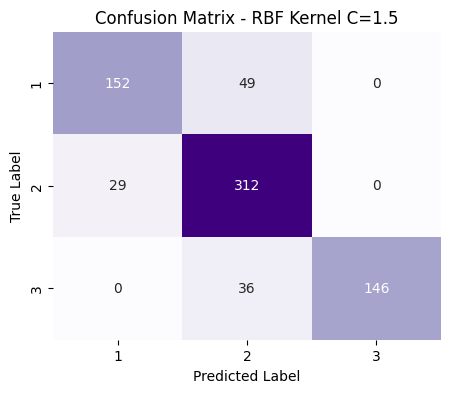

In [38]:
cm_rbf_c1 = confusion_matrix(y_test, y_pred_rbf_c1)


plt.figure(figsize=(5, 4))
sns.heatmap(cm_rbf_c1, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=["1", "2","3"], yticklabels=["1", "2","3"])
plt.title("Confusion Matrix - RBF Kernel C=1.5")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
svm_rbf_c2 = SVC(kernel='rbf', gamma='scale', C=2.5)
svm_rbf_c2.fit(X_train, y_train)
y_pred_rbf_c2 = svm_rbf_c2.predict(X_test)

print("\n RBF Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf_c2))
print(classification_report(y_test, y_pred_rbf_c2))


 RBF Kernel
Accuracy: 0.8466850828729282
              precision    recall  f1-score   support

 Backmarkers       0.85      0.76      0.80       201
    Midfield       0.79      0.92      0.85       341
      Top 10       1.00      0.81      0.89       182

    accuracy                           0.85       724
   macro avg       0.88      0.83      0.85       724
weighted avg       0.86      0.85      0.85       724



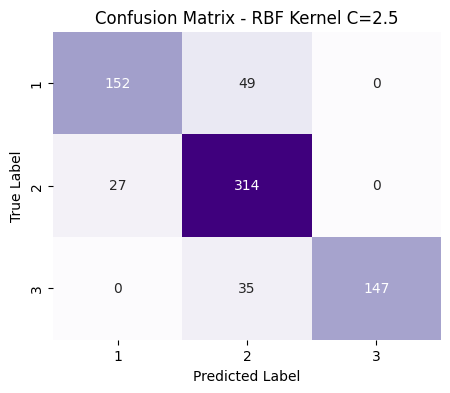

In [40]:
cm_rbf_c2 = confusion_matrix(y_test, y_pred_rbf_c2)


plt.figure(figsize=(5, 4))
sns.heatmap(cm_rbf_c2, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=["1", "2","3"], yticklabels=["1", "2","3"])
plt.title("Confusion Matrix - RBF Kernel C=2.5")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [41]:
svm_rbf_c3 = SVC(kernel='rbf', gamma='scale', C=3.5)
svm_rbf_c3.fit(X_train, y_train)
y_pred_rbf_c3 = svm_rbf_c3.predict(X_test)

print("\n RBF Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf_c3))
print(classification_report(y_test, y_pred_rbf_c3))


 RBF Kernel
Accuracy: 0.8494475138121547
              precision    recall  f1-score   support

 Backmarkers       0.86      0.76      0.80       201
    Midfield       0.79      0.93      0.85       341
      Top 10       1.00      0.81      0.89       182

    accuracy                           0.85       724
   macro avg       0.88      0.83      0.85       724
weighted avg       0.86      0.85      0.85       724



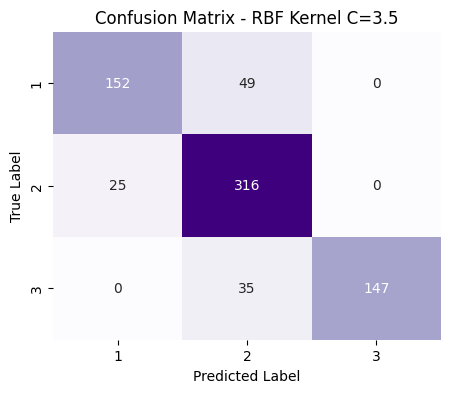

In [42]:
cm_rbf_c3 = confusion_matrix(y_test, y_pred_rbf_c3)


plt.figure(figsize=(5, 4))
sns.heatmap(cm_rbf_c3, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=["1", "2","3"], yticklabels=["1", "2","3"])
plt.title("Confusion Matrix - RBF Kernel C=3.5")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Linear with cost=0.02


In [43]:
svm_linear_c1 = SVC(kernel='linear', C=0.02)
svm_linear_c1.fit(X_train, y_train)
y_pred_linear_c1 = svm_linear_c1.predict(X_test)

print("\n Linear Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_linear_c1))
print(classification_report(y_test, y_pred_linear_c1))


 Linear Kernel
Accuracy: 0.675414364640884
              precision    recall  f1-score   support

 Backmarkers       0.75      0.01      0.03       201
    Midfield       0.59      1.00      0.74       341
      Top 10       1.00      0.80      0.89       182

    accuracy                           0.68       724
   macro avg       0.78      0.60      0.55       724
weighted avg       0.74      0.68      0.58       724



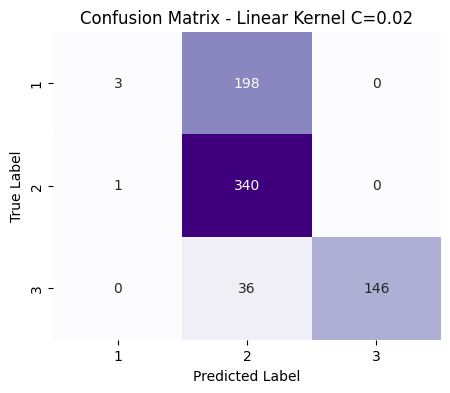

In [44]:
cm_linear_c1 = confusion_matrix(y_test, y_pred_linear_c1)


plt.figure(figsize=(5, 4))
sns.heatmap(cm_linear_c1, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=["1", "2", "3"], yticklabels=["1", "2", "3"])
plt.title("Confusion Matrix - Linear Kernel C=0.02")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [45]:
svm_linear_c2 = SVC(kernel='linear', C=0.5)
svm_linear_c2.fit(X_train, y_train)
y_pred_linear_c2 = svm_linear_c2.predict(X_test)

print("\n Linear Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_linear_c2))
print(classification_report(y_test, y_pred_linear_c2))


 Linear Kernel
Accuracy: 0.8052486187845304
              precision    recall  f1-score   support

 Backmarkers       0.84      0.59      0.69       201
    Midfield       0.73      0.93      0.82       341
      Top 10       1.00      0.80      0.89       182

    accuracy                           0.81       724
   macro avg       0.86      0.78      0.80       724
weighted avg       0.83      0.81      0.80       724



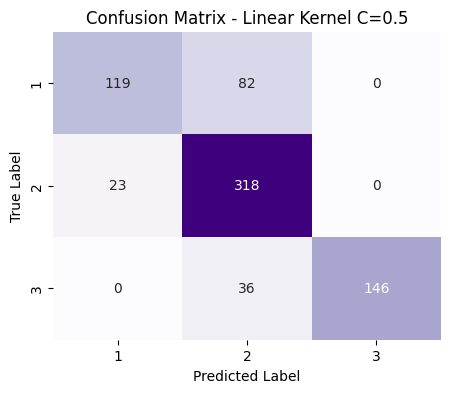

In [46]:
cm_linear_c2 = confusion_matrix(y_test, y_pred_linear_c2)


plt.figure(figsize=(5, 4))
sns.heatmap(cm_linear_c2, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=["1", "2", "3"], yticklabels=["1", "2", "3"])
plt.title("Confusion Matrix - Linear Kernel C=0.5")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:
svm_linear_c3 = SVC(kernel='linear', C=3.0)
svm_linear_c3.fit(X_train, y_train)
y_pred_linear_c3 = svm_linear_c3.predict(X_test)

print("\n Linear Kernel")
print("Accuracy:", accuracy_score(y_test, y_pred_linear_c3))
print(classification_report(y_test, y_pred_linear_c3))


 Linear Kernel
Accuracy: 0.8080110497237569
              precision    recall  f1-score   support

 Backmarkers       0.84      0.60      0.70       201
    Midfield       0.73      0.93      0.82       341
      Top 10       1.00      0.80      0.89       182

    accuracy                           0.81       724
   macro avg       0.86      0.78      0.80       724
weighted avg       0.83      0.81      0.81       724



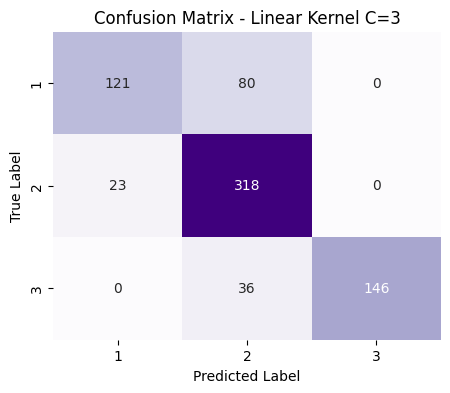

In [48]:
cm_linear_c3 = confusion_matrix(y_test, y_pred_linear_c3)


plt.figure(figsize=(5, 4))
sns.heatmap(cm_linear_c3, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=["1", "2", "3"], yticklabels=["1", "2", "3"])
plt.title("Confusion Matrix - Linear Kernel C=3")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [49]:
position_encoded = {'Top 10': 0, 'Midfield': 1, 'Backmarkers': 2}
df['Position_Category'] = df['Position_Category'].map(position_encoded)

In [50]:
df.head()

,Race Name,Circuit,Driver,Driver Age,Constructor,Constructor Nationality,Grid Position,Race Laps Completed,Retirement Status,Position_Category
0,0.0,0.0,0.0,36.0,0.0,0.0,13.0,67.0,0.0,0
1,0.0,0.0,1.0,44.0,0.0,0.0,15.0,67.0,0.0,0
2,0.0,0.0,2.0,33.0,1.0,1.0,16.0,64.0,0.0,0
3,0.0,0.0,3.0,35.0,1.0,1.0,20.0,64.0,0.0,0
4,0.0,0.0,4.0,35.0,1.0,1.0,20.0,64.0,0.0,0


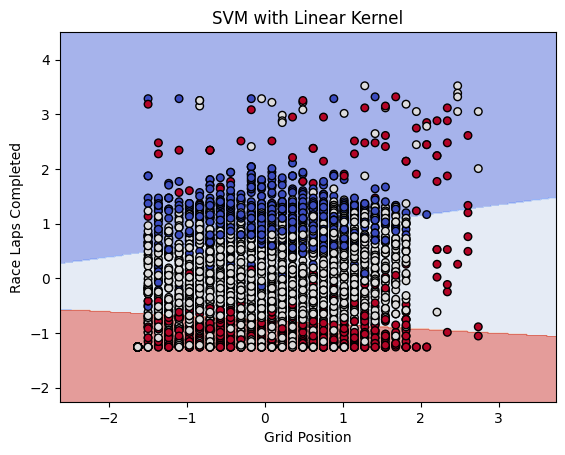

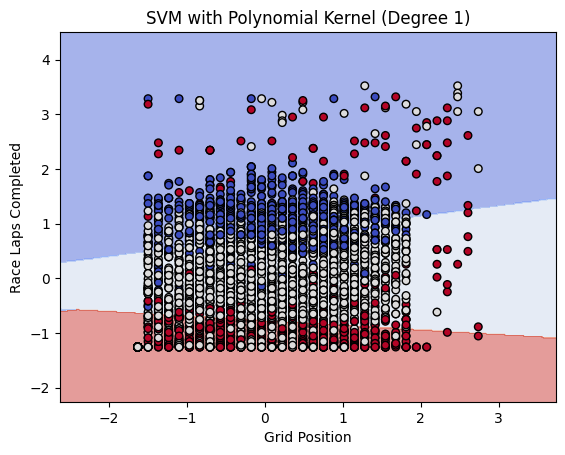

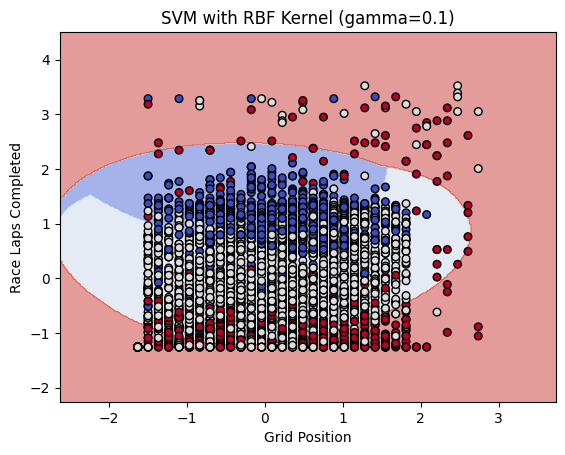

In [51]:


# Helper function to plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Grid Position')
    plt.ylabel('Race Laps Completed')
    plt.show()

# Create a simple dataset
X = df[['Grid Position', 'Race Laps Completed']].values  # input features (2 columns)
y = df['Position_Category'].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 1. SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X, y)
plot_decision_boundary(svm_linear, X, y, "SVM with Linear Kernel")

# 2. SVM with Polynomial Kernel (Degree 1 — almost linear)
svm_poly = SVC(kernel='poly', degree=1, C=1)
svm_poly.fit(X, y)
plot_decision_boundary(svm_poly, X, y, "SVM with Polynomial Kernel (Degree 1)")

# 3. SVM with RBF Kernel (Low gamma to make boundary smooth)
svm_rbf = SVC(kernel='rbf', gamma=0.1, C=1)
svm_rbf.fit(X, y)
plot_decision_boundary(svm_rbf, X, y, "SVM with RBF Kernel (gamma=0.1)")


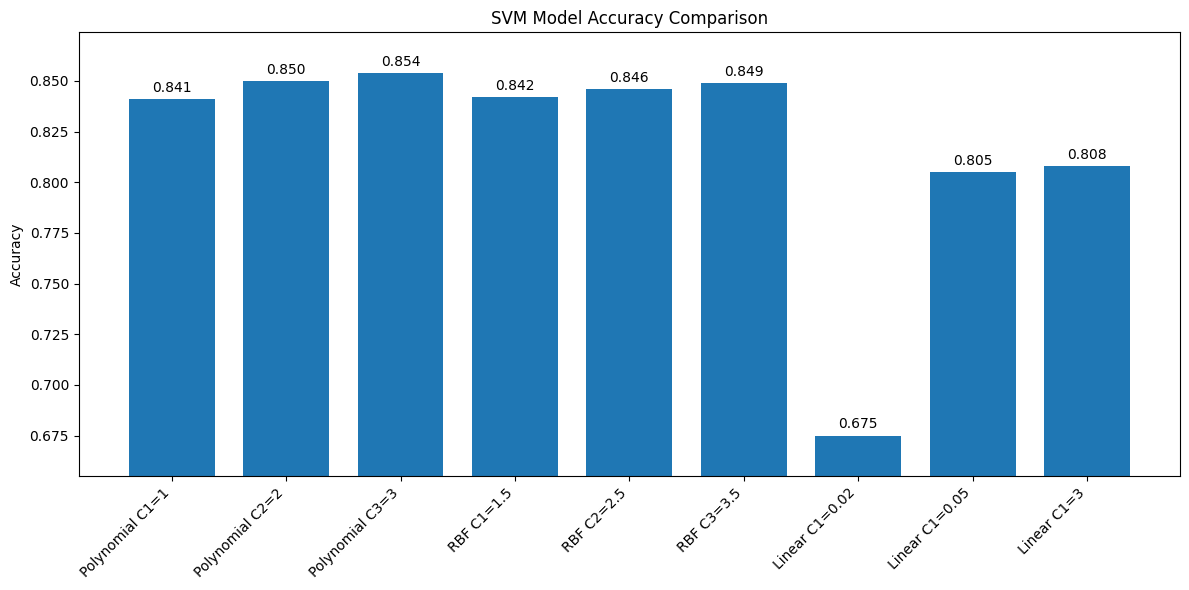

In [53]:
accuracy_scores = {
    'Polynomial C1=1': 0.841,
    'Polynomial C2=2': 0.850,
    'Polynomial C3=3': 0.854,
    'RBF C1=1.5': 0.842,
    'RBF C2=2.5': 0.846,
    'RBF C3=3.5': 0.849,
    'Linear C1=0.02': 0.675,
    'Linear C1=0.05': 0.805,
    'Linear C1=3': 0.808
}

labels = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

x = np.arange(len(labels))
width = 0.75

fig, ax = plt.subplots(figsize=(12, 6))
rects = ax.bar(x, accuracies, width)

# Add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_title('SVM Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylim([min(accuracies) - 0.02, max(accuracies) + 0.02])  # Adjust y-axis limits

# Add accuracy values on top of the bars
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

fig.tight_layout()
plt.show()